# Portfolio Exam

<p style="background-color:#D8BFD8; color: #333333; font-size: 200%; text-align: left; padding-left: 20px;">Story:</p>


### Introduction:

Immigration often entails a significant upheaval in an individual's life, impacting their mental and emotional well-being. As an immigrant in Germany, I have experienced firsthand the complexities and challenges that accompany resettling in a new country. These experiences have motivated me to conduct an experiment focusing on the mental health of immigrants, although the specific context will be based on data from a different demographic. 

For this experiment, I will utilize the "Report of the Asian American Quality of Life," a comprehensive survey that captures various aspects of the lived experiences of Asian Americans in the USA, including their mental health status. This dataset provides valuable insights into the mental health challenges faced by immigrants and can serve as a proxy for similar issues faced by immigrants in Germany and other parts of the world.

### Importance of the Experiment:

Understanding the mental health of immigrant populations is crucial for several reasons:

1. **Policy Formulation and Support Services**: By identifying common mental health issues among immigrants, policymakers can design targeted interventions and support services to address these needs effectively.

2. **Integration and Social Cohesion**: Mental health significantly impacts an individual's ability to integrate into society. Improving mental health outcomes can enhance social cohesion and reduce the societal costs associated with mental health issues.

3. **Personal and Community Well-being**: Promoting mental well-being among immigrants not only improves individual quality of life but also strengthens community bonds and resilience.

### Goals of the Experiment:

The primary goal of this deep learning experiment is to develop a model that can classify individuals based on their mental health status using the provided dataset. By analyzing various factors such as demographics, socio-economic status, and personal experiences, the model aims to identify patterns and predictors of mental health outcomes. The specific objectives include:

1. **Data Exploration and Preprocessing**: To understand the dataset, clean it, and prepare it for analysis. This involves handling missing values and selecting relevant features.

2. **Model Development**: To design and train a deep learning model that can accurately classify individuals into different mental health categories based on the provided features.

3. **Evaluation and Interpretation**: To evaluate the model's performance using appropriate metrics and interpret the results to gain insights into the factors influencing mental health among Asian Americans.

4. **Generalization**: To explore the potential for applying the model's insights to other immigrant populations, including those in Germany, to draw broader conclusions about the mental health challenges faced by immigrants globally.

By leveraging advanced deep learning techniques, this experiment aims to contribute to the understanding and improvement of mental health among immigrant communities, ultimately fostering a more inclusive and supportive environment for all.

<p style="background-color:#D8BFD8; color: #333333; font-size: 200%; text-align: left; padding-left: 20px;">Data:</p>


### Data is obtained from catalog.data.gov. The website is the U.S. government's comprehensive catalog of open data, providing access to a vast array of datasets from various federal, state, and local agencies. 

The U.S. Census defines Asian Americans as individuals having origins in any of the original peoples of the Far East, Southeast Asia, or the Indian subcontinent (U.S. Office of Management and Budget, 1997). As a broad racial category, Asian Americans are the fastest-growing minority group in the United States (U.S. Census Bureau, 2012). The growth rate of 42.9% in Asian Americans between 2000 and 2010 is phenomenal given that the corresponding figure for the U.S. total population is only 9.3% (see Figure 1). Currently, Asian Americans make up 5.6% of the total U.S. population and are projected to reach 10% by 2050. It is particularly notable that Asians have recently overtaken Hispanics as the largest group of new immigrants to the U.S. (Pew Research Center, 2015). The rapid growth rate and unique challenges as a new immigrant group call for a better understanding of the social and health needs of the Asian American population.

Source: https://catalog.data.gov/dataset/final-report-of-the-asian-american-quality-of-life-aaqol



In [471]:
import pandas as pd
Data=pd.read_csv('Final_Report_of_the_Asian_American_Quality_of_Life.csv')
Data.head(4)
print(f"Shape of dataset: { Data.shape}")

Shape of dataset: (2609, 231)


The dataset comprises responses from 2,609 unique individuals to 231 questions. For the experiment, we will retain only the most relevant columns, determined through subjective analysis and the completeness of the data. This approach ensures that the analysis focuses on the most significant and comprehensive information available.

In [472]:
Selected_cols=['Age','Gender','Ethnicity','Marital Status', #  key demographic attributes which provide foundational insights into the respondents' backgrounds;
               'Education Completed', # Number of years of education;
               'Household Size', # Number of people in family;
               'No One', 'Spouse', 'Children', 'Parent','Friends', # These columns refer to the living with condition, Yes-No question;
               'US Born','Duration of Residency', # Some additional demographic features
               'Full Time Employment',	'Part Time Employment', # Also Yes-No questions whether person is full time or part time employee
               'Student', # Whether person is a student or not
               'Retired', # Whether person is retierd or not
               'Income', #Incoe range
               'English Speaking', # Whether person speaks native langugage 
               'Identify Ethnically', # How does a person itentify him/herself to her/his original etnicity
               'Discrimination ', # Whether a person has experienced discrimination 
               'Smoking',	'Drinking', # Unhealthy behaviours
               'Regular Exercise',  'Healthy Diet',	# Whether a person exercise physically regularly and keeps healthy diet
               'Diabetes',	 # wheter a person has diabetes
               'Quality of Life',	# Rating life quality from 1 to 10
               'See Family', 'See Friends', # How often a peron sees his/her family/friends on the scale from 1 to 5
               'Present Mental Health',  # How healthy does a person is mentally
               ]


In [473]:
# From the original dataset leaving only the neccessary columns.
for col in Data.columns:
    if col not in Selected_cols:
        Data.drop(columns=col,inplace=True)
Data.head(4)

,Age,Gender,Ethnicity,Marital Status,Education Completed,Household Size,No One,Spouse,Children,Parent,Friends,Full Time Employment,Part Time Employment,Student,Retired,Income,US Born,Duration of Residency,English Speaking,Identify Ethnically,Discrimination,Present Mental Health,Smoking,Drinking,Regular Exercise,Healthy Diet,Diabetes,Quality of Life,See Family,See Friends
0,NaN,NaN,Vietnamese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60.0,Male,Chinese,Married,13.0,6.0,0,0,Living with children,0,0,0,0,0,Retired,"$30,000 - $39,999",No,0.5,Not at all,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23.0,Female,Chinese,Single,16.0,3.0,0,0,0,Living with parents,0,0,0,0,0,"$0 - $9,999",No,11.0,Well,Very close,0.0,Good,0.0,0.0,0.0,1.0,0,8.0,4.0,4.0
3,73.0,Female,Chinese,Other,13.0,1.0,Living with no one,0,0,0,0,0,0,0,Retired,NaN,No,50.0,Not well,Very close,0.0,Very Good,0.0,0.0,1.0,1.0,0,NaN,NaN,NaN


<p style="background-color:#D8BFD8; color: #333333; font-size: 200%; text-align: left; padding-left: 20px;">EDA:</p>


In [474]:
# Concatenation living conditins instead of having that information in 5 different colums
import numpy as np
import re
Data['Living_with']=Data['No One']+Data['Spouse']+Data['Children']+Data['Parent']+Data['Friends']
Data.drop(columns=[ 'No One', 'Spouse', 'Children', 'Parent','Friends'], inplace=True)

Data['Living_with'] = Data['Living_with'].fillna('')
for index, text in enumerate(Data['Living_with']):
    if isinstance(text, str):
        Data.at[index, 'Living_with'] = re.sub(r'0+|0', '', text)


In [475]:
# Removing rows with NaN values and checking what is the size of working dataframe
Data=Data.dropna(axis=0)
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1952 entries, 2 to 2608
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1952 non-null   float64
 1   Gender                 1952 non-null   object 
 2   Ethnicity              1952 non-null   object 
 3   Marital Status         1952 non-null   object 
 4   Education Completed    1952 non-null   float64
 5   Household Size         1952 non-null   float64
 6   Full Time Employment   1952 non-null   object 
 7   Part Time Employment   1952 non-null   object 
 8   Student                1952 non-null   object 
 9   Retired                1952 non-null   object 
 10  Income                 1952 non-null   object 
 11  US Born                1952 non-null   object 
 12  Duration of Residency  1952 non-null   float64
 13  English Speaking       1952 non-null   object 
 14  Identify Ethnically    1952 non-null   object 
 15  Discrimin

In [476]:
#In the dataset there is a column 'Income' which consist of values in ranges, for the further analysis it will be converted to average values.

Data['Income']=Data['Income'].replace("$70,000 and over", "$70,000 - $70,000")

# Split the 'Income' column into two separate columns
Data[['Min', 'Max']] = Data['Income'].str.split(' - ', expand=True)
# Remove '$' sign and commas from the values
Data['Min'] = Data['Min'].str.strip('$').str.replace(',', '')
Data['Max'] = Data['Max'].str.strip('$').str.replace(',', '')
# Convert the columns to integers
Data['Min'] = Data['Min'].astype(int)
Data['Max'] = Data['Max'].astype(int)
Data['AVG_Income']=(Data['Min']+Data['Max'])/2

Data.drop(columns=['Min',	'Max', 'Income'], inplace=True)
Data.head(3)

,Age,Gender,Ethnicity,Marital Status,Education Completed,Household Size,Full Time Employment,Part Time Employment,Student,Retired,US Born,Duration of Residency,English Speaking,Identify Ethnically,Discrimination,Present Mental Health,Smoking,Drinking,Regular Exercise,Healthy Diet,Diabetes,Quality of Life,See Family,See Friends,Living_with,AVG_Income
2,23.0,Female,Chinese,Single,16.0,3.0,0,0,0,0,No,11.0,Well,Very close,0.0,Good,0.0,0.0,0.0,1.0,0,8.0,4.0,4.0,Living with parents,4999.5
8,25.0,Male,Asian Indian,Single,17.0,1.0,Employed full time,0,0,0,No,2.0,Very well,Not very close,0.0,Excellent,1.0,0.0,1.0,1.0,0,10.0,3.0,5.0,Living with no one,54999.5
9,60.0,Female,Asian Indian,Single,17.0,3.0,0,0,0,Retired,No,47.0,Very well,Not very close,0.0,Excellent,0.0,0.0,1.0,1.0,0,9.0,3.0,4.0,Living with parents,70000.0


In [477]:
# Since many columns in the dataframe consist of categorical variables it needs to be replaced by numerical values;
# For the above purpose LabelEncoding is implemented.

from sklearn.preprocessing import LabelEncoder

#LabelEncoder
label_encoder = LabelEncoder()
for col in Data.select_dtypes(include=['object']).columns:
    Data[col] = label_encoder.fit_transform(Data[col])

### Checking the final working dataset structure:

In [478]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1952 entries, 2 to 2608
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1952 non-null   float64
 1   Gender                 1952 non-null   int32  
 2   Ethnicity              1952 non-null   int32  
 3   Marital Status         1952 non-null   int32  
 4   Education Completed    1952 non-null   float64
 5   Household Size         1952 non-null   float64
 6   Full Time Employment   1952 non-null   int32  
 7   Part Time Employment   1952 non-null   int32  
 8   Student                1952 non-null   int32  
 9   Retired                1952 non-null   int32  
 10  US Born                1952 non-null   int32  
 11  Duration of Residency  1952 non-null   float64
 12  English Speaking       1952 non-null   int32  
 13  Identify Ethnically    1952 non-null   int32  
 14  Discrimination         1952 non-null   float64
 15  Present M

In [479]:
Data.head(3)

,Age,Gender,Ethnicity,Marital Status,Education Completed,Household Size,Full Time Employment,Part Time Employment,Student,Retired,US Born,Duration of Residency,English Speaking,Identify Ethnically,Discrimination,Present Mental Health,Smoking,Drinking,Regular Exercise,Healthy Diet,Diabetes,Quality of Life,See Family,See Friends,Living_with,AVG_Income
2,23.0,0,1,3,16.0,3.0,0,0,0,0,0,11.0,3,3,0.0,2,0.0,0.0,0.0,1.0,0,8.0,4.0,4.0,8,4999.5
8,25.0,1,0,3,17.0,1.0,1,0,0,0,0,2.0,2,1,0.0,0,1.0,0.0,1.0,1.0,0,10.0,3.0,5.0,4,54999.5
9,60.0,0,0,3,17.0,3.0,0,0,0,1,0,47.0,2,1,0.0,0,0.0,0.0,1.0,1.0,0,9.0,3.0,4.0,8,70000.0


<p style="background-color:#D8BFD8; color: #333333; font-size: 200%; text-align: left; padding-left: 20px;">IDA:</p>


### Since the dataset is a survey and it has many categorical values it is crucial to identify how diverse it actually is.

In [480]:
from scipy.stats import entropy

entropy_dict = {}

for col in Data.columns:
    counts = Data[col].value_counts()
    ent = entropy(counts)
    entropy_dict[col] = ent
sorted_entropy = sorted(entropy_dict.items(), key=lambda item: item[1], reverse=True)

for col, ent in sorted_entropy:
    print(f'Entropy for {col}: {ent}')


Entropy for Age: 4.046733017708277
Entropy for Duration of Residency: 3.638950450573448
Entropy for Living_with: 1.8811362673003904
Entropy for AVG_Income: 1.7935307254555013
Entropy for Quality of Life: 1.7923112865977755
Entropy for Household Size: 1.7052637371079244
Entropy for Ethnicity: 1.6986302428400835
Entropy for Education Completed: 1.6864234108858625
Entropy for See Friends: 1.6291797173031222
Entropy for See Family: 1.5894898229476795
Entropy for Present Mental Health: 1.303148006809933
Entropy for English Speaking: 1.2223987534518495
Entropy for Identify Ethnically: 1.0106441361254468
Entropy for Marital Status: 0.7985510918340009
Entropy for Full Time Employment: 0.6911281345670395
Entropy for Gender: 0.6904988587610064
Entropy for Regular Exercise: 0.6700408273581685
Entropy for Discrimination : 0.6266220722236349
Entropy for Healthy Diet: 0.49582346409336525
Entropy for Student: 0.4342618127140443
Entropy for Part Time Employment: 0.3370723958028208
Entropy for Retired:

Entropy is a measure of the randomness or disorder within a set of values, and in this context, it is used to assess the diversity of categorical columns.
The most diverse column seems to be An age followed by Duration of residency and living condition (with friends, alone, family, etc.)

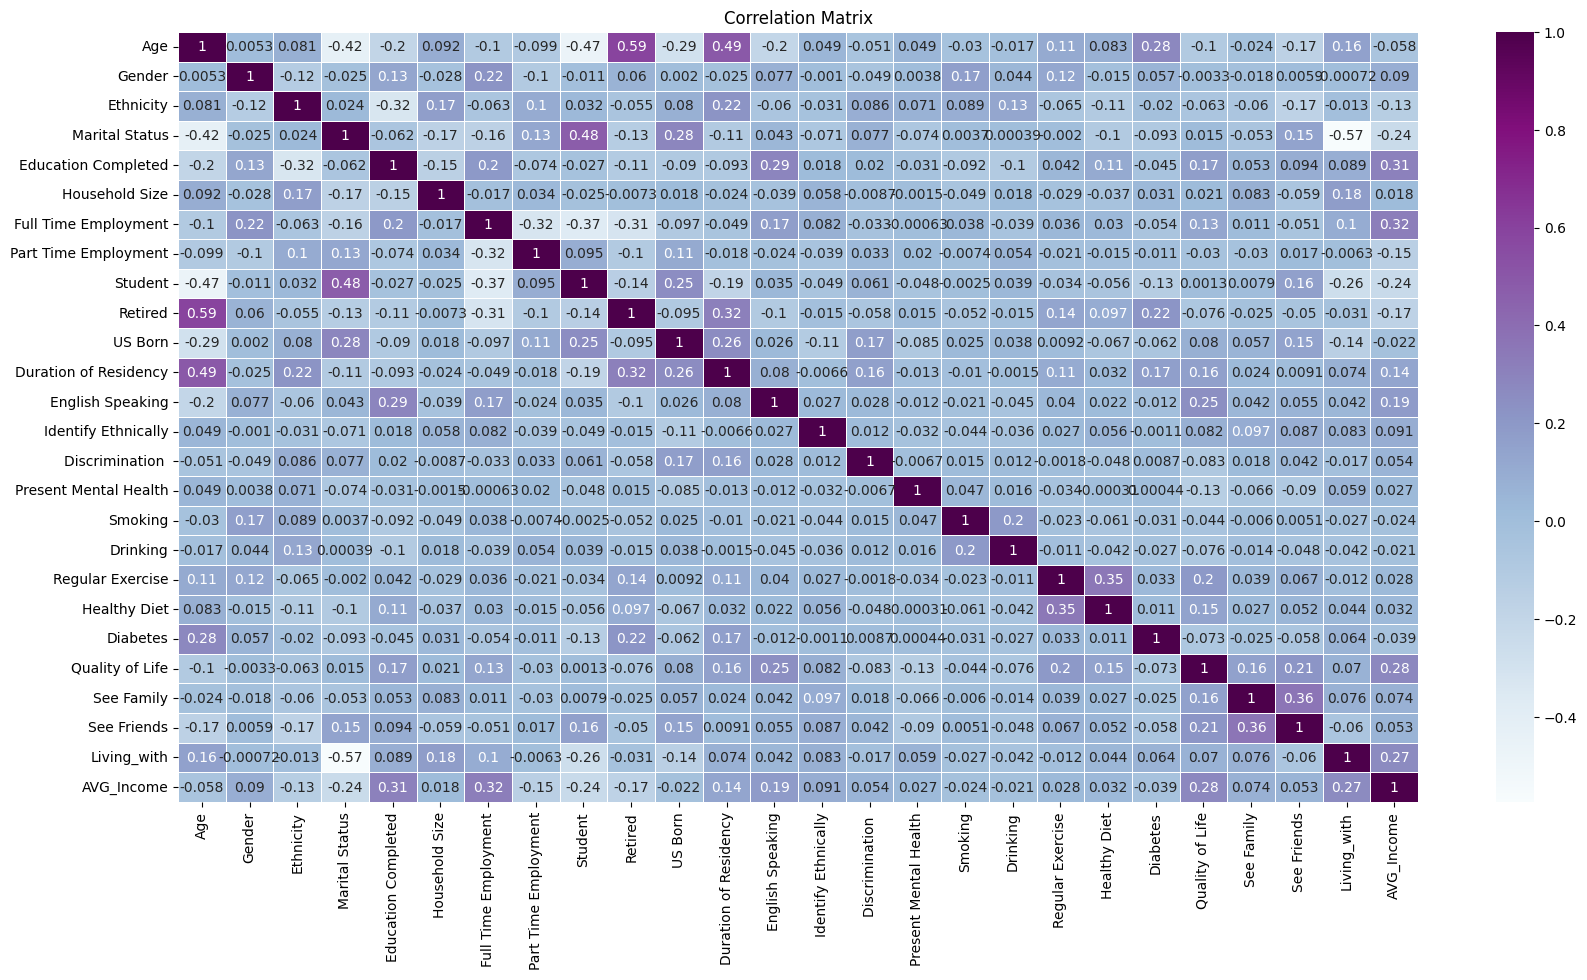

In [481]:
import matplotlib.pylab as plt
import seaborn as sns

correlation_matrix = Data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix,annot=True,  cmap='BuPu', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

The correlation matrix reveals several key relationships between different features in the dataset. Notably, age is strongly positively correlated with retirement (0.59), indicating that older individuals are more likely to be retired. There is also a moderate negative correlation between age and marital status (-0.42), suggesting that older individuals are more likely to be widowed or divorced, and a positive correlation with diabetes (0.28), indicating a higher prevalence of diabetes among older individuals.

Gender shows a positive correlation with full-time employment (0.22), highlighting gender differences in employment status. Marital status is positively correlated with being a student (0.48), implying that younger, possibly unmarried individuals are more likely to be students. Additionally, marital status strongly influences living arrangements, as indicated by the negative correlation with living with someone (-0.57). Education level is positively correlated with average income (0.31), showing that higher education levels lead to higher earnings. These insights underscore important socio-economic patterns and relationships within the dataset, such as the impact of age on retirement and health, and the influence of education on income.

#### Some statistical features:

In [482]:
pd.set_option('display.max_columns', None)
Data.describe()

,Age,Gender,Ethnicity,Marital Status,Education Completed,Household Size,Full Time Employment,Part Time Employment,Student,Retired,US Born,Duration of Residency,English Speaking,Identify Ethnically,Discrimination,Present Mental Health,Smoking,Drinking,Regular Exercise,Healthy Diet,Diabetes,Quality of Life,See Family,See Friends,Living_with,AVG_Income
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,41.631148,0.463627,2.182377,1.534836,15.214139,3.274590,0.468238,0.105533,0.156762,0.100922,0.099898,15.789395,1.972848,2.279201,0.319672,2.217725,0.063525,0.027664,0.607070,0.803279,0.081455,7.730533,3.126537,3.223361,8.081455,49187.726178
std,16.350317,0.498803,1.782809,0.945905,2.312191,1.428784,0.499118,0.307317,0.363670,0.301303,0.299940,12.636787,0.866709,0.697376,0.466469,1.620674,0.243967,0.164050,0.488527,0.397622,0.273603,1.587086,1.300109,1.366775,3.904291,23706.467591
min,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4999.500000
25%,28.000000,0.000000,1.000000,1.000000,14.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,7.000000,2.000000,2.000000,4.000000,24999.500000
50%,39.000000,0.000000,2.000000,1.000000,16.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.500000,2.000000,2.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,8.000000,3.000000,3.000000,10.000000,64999.500000
75%,53.000000,1.000000,3.000000,3.000000,17.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,24.000000,3.000000,3.000000,1.000000,4.000000,0.000000,0.000000,1.000000,1.000000,0.000000,9.000000,4.000000,4.000000,11.000000,70000.000000
max,98.000000,1.000000,5.000000,3.000000,17.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,78.000000,3.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,5.000000,5.000000,15.000000,70000.000000


The dataset summarizes demographic and lifestyle information for 1,952 individuals. The average age is 41.6 years, with nearly equal distribution between genders. The mean education level is 15.2 years. About 46.8% of individuals are employed full-time, and the average household size is 3.27 members. Health-wise, 60.7% exercise regularly, 80.3% follow a healthy diet, and 8.1% have diabetes. The average income is approximately $49,188.

<p style="background-color:#D8BFD8; color: #333333; font-size: 200%; text-align: left; padding-left: 20px;">Baselines:</p>


### N1: For the simple baseline model Dummy Classifier is chosen.

#### Libraries:


In [483]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

#### Model:

In [484]:
target_column = 'Present Mental Health'

# Extract features (X) and target (y)
X = Data.drop(columns=[target_column])
y = Data[target_column]

# Calculate the majority class
majority_class = y.value_counts().idxmax()

# 1. Simple Suitable Classification Baseline (Without Training a Model)
dummy_clf = DummyClassifier(strategy="constant", constant=majority_class)
dummy_clf.fit(X, y)
dummy_pred = dummy_clf.predict(X)

# Compute evaluation metrics for the dummy classifier
dummy_metrics = {
    'Accuracy': accuracy_score(y, dummy_pred),
    'Precision': precision_score(y, dummy_pred, average='weighted'),
    'Recall': recall_score(y, dummy_pred, average='weighted'),
    'F1-score': f1_score(y, dummy_pred, average='weighted')
}


warnings.filterwarnings("ignore")
dummy_metrics

{'Accuracy': 0.39241803278688525,
 'Precision': 0.15399191245632893,
 'Recall': 0.39241803278688525,
 'F1-score': 0.22118632311608097}

The algoritm involves using a simple classification baseline that does not require training a model.

**Data Preparation**:
   - The target column is defined as `'Present Mental Health'`.

**Results**:
   - The computed metrics for the dummy classifier are as follows:
     - **Accuracy**: 39.24%
     - **Precision**: 15.40%
     - **Recall**: 39.24%
     - **F1-score**: 22.12%

These results indicate that the dummy classifier, which simply predicts the majority class for all instances, performs poorly across all metrics, as expected. This serves as a baseline to compare more sophisticated models against, highlighting the need for better classification techniques to achieve higher performance.

### N2: Running and evaluating a classical machine learning classification algorithm, specifically logistic regression, using default parameters.

In [485]:
# 2. Classical Machine Learning Classification Algorithm (With Default Parameters)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

# Compute evaluation metrics for the logistic regression classifier
log_reg_metrics = {
    'Accuracy': accuracy_score(y_test, log_reg_pred),
    'Precision': precision_score(y_test, log_reg_pred, average='weighted'),
    'Recall': recall_score(y_test, log_reg_pred, average='weighted'),
    'F1-score': f1_score(y_test, log_reg_pred, average='weighted')
}

warnings.filterwarnings("ignore")
log_reg_metrics

{'Accuracy': 0.40153452685422,
 'Precision': 0.37895840807946507,
 'Recall': 0.40153452685422,
 'F1-score': 0.35386714315862183}

### Comparison:

In [486]:
df = pd.DataFrame(log_reg_metrics, index=[0])
df['metrics'] = 'Log_reg'
df0 = pd.DataFrame(dummy_metrics, index=[0])
df0['metrics'] = 'Dummy'
Results = pd.concat([df0, df], axis=0)
Results = Results.reset_index(drop=True)
Results

,Accuracy,Precision,Recall,F1-score,metrics
0,0.392418,0.153992,0.392418,0.221186,Dummy
1,0.401535,0.378958,0.401535,0.353867,Log_reg


#### The logistic regression model outperforms the dummy classifier across all metrics, demonstrating that even a basic logistic regression model can provide a significant improvement over a naive baseline.

<p style="background-color:#D8BFD8; color: #333333; font-size: 200%; text-align: left; padding-left: 20px;">Deep Learning Experiments:</p>


### Libraries:

In [487]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
from sklearn import metrics
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Architecture N1: Enhanced Perceptron

The EnhancedPerceptron class is an advanced deep learning architecture that includes layers beyond simple linear layers and activation functions. It incorporates:

**Batch Normalization:** Improves training stability and accelerates convergence.

**Dropout Regularization:** Reduces overfitting by randomly setting a fraction of input units to zero during training.

By using these additional layers, the EnhancedPerceptron class goes beyond simple linear transformations and activation functions, addressing the task's requirement to train a deep learning model with more complex layers.

In [488]:

# Define EnhancedPerceptron class
class EnhancedPerceptron(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(EnhancedPerceptron, self).__init__()
        self.lin1 = nn.Linear(input_size, hidden_size)
        self.batch_norm1 = nn.BatchNorm1d(hidden_size)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(p=0.5)
        self.lin2 = nn.Linear(hidden_size, hidden_size)
        self.batch_norm2 = nn.BatchNorm1d(hidden_size)
        self.dropout2 = nn.Dropout(p=0.5)
        self.lin3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.lin1(x)
        x = self.batch_norm1(x)
        x = self.relu(x)
        x = self.dropout1(x)
        x = self.lin2(x)
        x = self.batch_norm2(x)
        x = self.relu(x)
        x = self.dropout2(x)
        x = self.lin3(x)
        return x

    def predict(self, x):
        with torch.no_grad():
            probabilities = self.forward(x)
            return torch.argmax(probabilities, dim=1)


### Function to train the model with logging and early stopping based on test loss:


In [489]:
def train_model(model, learning_rate, criterion, epochs, X_train, y_train, X_val, y_val, X_test, y_test):
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []
    val_losses = []
    test_losses = []
    best_test_loss = float('inf')
    best_model_state = None
    early_stop_counter = 0
    patience = 5

    for epoch in range(epochs):
        # Training
        model.train()
        optimizer.zero_grad()
        y_train_pred = model(X_train)
        train_loss = criterion(y_train_pred, y_train)
        
        # Adding L2 regularization to the loss
        l2_reg = torch.tensor(0.)
        for param in model.parameters():
            l2_reg += torch.norm(param)
        loss = train_loss + 0.001 * l2_reg

        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        # Validation
        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = criterion(y_val_pred, y_val)
        
        val_losses.append(val_loss.item())

        # Test
        with torch.no_grad():
            y_test_pred = model(X_test)
            test_loss = criterion(y_test_pred, y_test)
        
        test_losses.append(test_loss.item())

        # Early stopping based on test loss
        if test_loss < best_test_loss:
            best_test_loss = test_loss
            best_model_state = model.state_dict()
            early_stop_counter = 0
        else:
            early_stop_counter += 1

        # Print losses on each epoch
        print(f"Epoch: {epoch}, Train Loss: {train_loss.item()}, Val Loss: {val_loss.item()}, Test Loss: {test_loss.item()}")

        if early_stop_counter >= patience:
            print(f"Early stopping at epoch {epoch}, best test loss: {best_test_loss}")
            break

    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    return train_losses, val_losses, test_losses



### Evaluation metrics:

In [490]:

def compute_evaluation_metrics(model, X, y):
    model.eval()
    with torch.no_grad():
        y_pred = model.predict(X)
    
    accuracy = metrics.accuracy_score(y, y_pred)
    precision = metrics.precision_score(y, y_pred, average='weighted')
    recall = metrics.recall_score(y, y_pred, average='weighted')
    f1 = metrics.f1_score(y, y_pred, average='weighted')
    
    return accuracy, precision, recall, f1

### Function to initialize weights and biases:

In [491]:
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        nn.init.zeros_(m.bias)

### Splitting data into train, validation and test sets:

In [492]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

### Scaling:

In [493]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### Convert scaled data to PyTorch tensors:

In [494]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

### Initialize the model with Tensorboard:


In [495]:
model = EnhancedPerceptron(input_size=X_train.shape[1], hidden_size=64, num_classes=5)
model.apply(init_weights)

# Initialize TensorBoard writer
writer = SummaryWriter('logs_v1')


# Example usage
criterion = nn.CrossEntropyLoss()
learning_rate = 0.01
epochs = 2000

torch.manual_seed(1)
train_losses, val_losses, test_losses = train_model(model, learning_rate, criterion, epochs, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, X_test_tensor, y_test_tensor)


Epoch: 0, Train Loss: 2.336048126220703, Val Loss: 1.666295051574707, Test Loss: 1.6236482858657837
Epoch: 1, Train Loss: 2.006822347640991, Val Loss: 1.5868393182754517, Test Loss: 1.5384037494659424
Epoch: 2, Train Loss: 1.782388687133789, Val Loss: 1.5256789922714233, Test Loss: 1.4743986129760742
Epoch: 3, Train Loss: 1.6667803525924683, Val Loss: 1.4768260717391968, Test Loss: 1.4257714748382568
Epoch: 4, Train Loss: 1.5566117763519287, Val Loss: 1.4376238584518433, Test Loss: 1.3902755975723267
Epoch: 5, Train Loss: 1.4633538722991943, Val Loss: 1.3989437818527222, Test Loss: 1.3588857650756836
Epoch: 6, Train Loss: 1.420847773551941, Val Loss: 1.3604063987731934, Test Loss: 1.3318957090377808
Epoch: 7, Train Loss: 1.4447232484817505, Val Loss: 1.3270610570907593, Test Loss: 1.3105103969573975
Epoch: 8, Train Loss: 1.3832675218582153, Val Loss: 1.300809383392334, Test Loss: 1.2944066524505615
Epoch: 9, Train Loss: 1.3671050071716309, Val Loss: 1.2821358442306519, Test Loss: 1.282

The training logs show the loss values for training, validation, and test sets over 62 epochs. Initially, the losses for all sets are quite high, but they decrease steadily as training progresses. This indicates that the model is learning and improving its performance on the given task. 

The training loss consistently decreases, reaching around 1.1, which is a significant improvement from the initial value of 2.13. The validation and test losses follow a similar downward trend, converging to around 1.17 by epoch 62. The use of early stopping at epoch 62 suggests that further training would likely result in overfitting, as the validation and test losses started to stabilize. Overall, the training appears effective, with a marked reduction in loss across all datasets, demonstrating the model's improved ability to generalize to unseen data.

### Function to display evaluation results and return DataFrame:

In [496]:
def display_evaluation_results(accuracy, precision, recall, f1):
    return pd.DataFrame({
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1-score': [f1]
    })

### Generating results:

In [497]:
accuracy, precision, recall, f1 = compute_evaluation_metrics(model, X_test_tensor, y_test_tensor)

In [498]:
evaluation_results = display_evaluation_results(accuracy, precision, recall, f1)
evaluation_results['metrics'] = 'EnhancedPerceptron'
Results = pd.concat([Results, evaluation_results], axis=0)
Results = Results.reset_index(drop=True)
Results

,Accuracy,Precision,Recall,F1-score,metrics
0,0.392418,0.153992,0.392418,0.221186,Dummy
1,0.401535,0.378958,0.401535,0.353867,Log_reg
2,0.478261,0.516575,0.478261,0.464476,EnhancedPerceptron


The enhanced perceptron model outperforms both the dummy classifier and the logistic regression model. Its accuracy (0.478261) and recall (0.478261) are higher than the previous models, indicating a better fit and generalization. Precision (0.516575) and F1-score (0.464476) show substantial improvements, demonstrating a more balanced performance and better handling of the positive class predictions.

In summary, the results show a clear performance progression from the dummy classifier to the enhanced perceptron. The enhanced perceptron achieves the best performance across all metrics, illustrating the benefit of using a more complex neural network architecture with additional layers, batch normalization, dropout, and activation functions beyond simple linear transformations.


### Tensorboard:

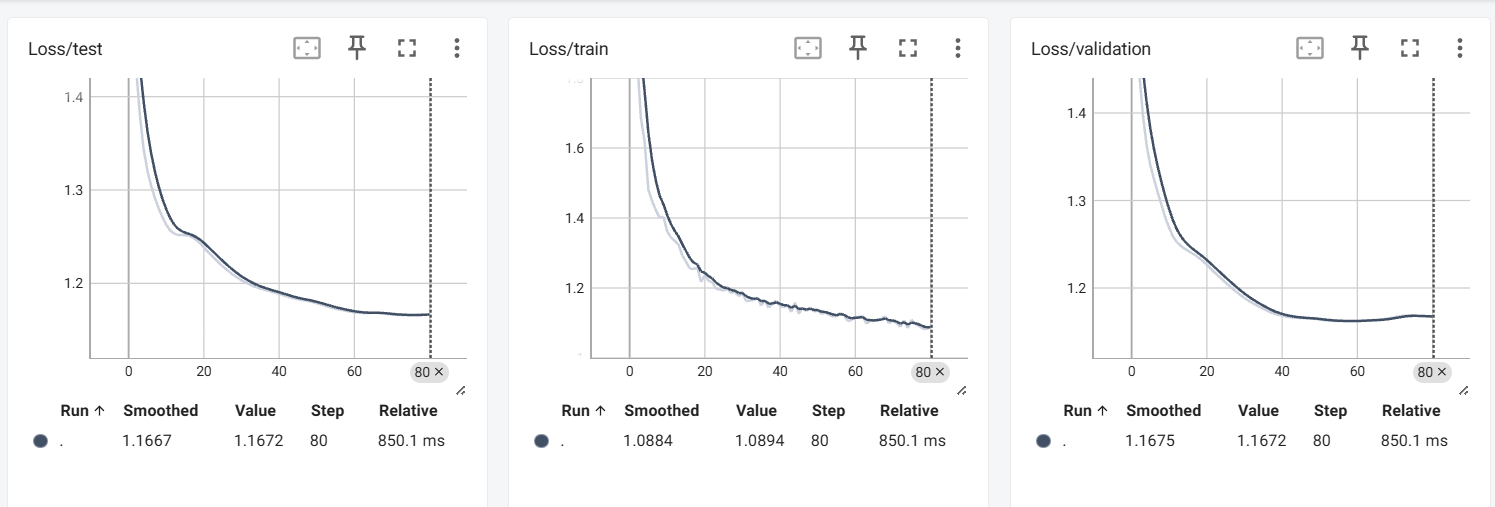

Each  TensorBoard chart represents the loss metrics over training steps for a machine learning model:

- **Decreasing Loss**: All three graphs exhibit a downward trend, which is a good sign. It indicates that the model's loss is decreasing over time, suggesting that the model is learning and improving its performance.
- **Dataset Comparison**: The separate lines allow us to compare how the model performs on different datasets: test, train, and validation. Ideally, we want all three to decrease, showing the model is not overfitting or underfitting.
- **Training Insights**: By analyzing the rate of decrease and any plateaus or increases in loss, we can gain insights into the training process, such as when to stop training or adjust hyperparameters.

**Insights:**
The decreasing trend in all three loss curves (Test, Train, and Validation) suggests that the model is converging during training implying it’s learning from the data and improving its predictions.

## Architecture N2: Tabular Transformer

### Libraries:

In [499]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

The TabularTransformer class defines a deep learning architecture tailored for tabular data using transformer components. Since the experiment is conducted on tabular data it might be relevant and generated desired results.

It begins by embedding input features into a higher-dimensional space, followed by applying multiple transformer encoder layers that utilize self-attention mechanisms to capture dependencies across features effectively.

The model aggregates information across feature dimensions and uses a final linear layer for classification into multiple classes. Its design enables it to handle complex relationships within tabular datasets, offering enhanced performance by leveraging transformer-based architectures known for their ability to learn global dependencies and interactions among features. 

In [500]:
class TabularTransformer(nn.Module):
    def __init__(self, input_dim, num_heads, num_layers, hidden_dim, num_classes):
        super(TabularTransformer, self).__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=hidden_dim, nhead=num_heads, activation='relu')
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(hidden_dim, num_classes)
        
    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)  # Add a sequence dimension
        x = self.transformer_encoder(x)
        x = self.fc(x[:, 0, :])  # Use only the first token's representation for classification
        return x

    def predict(self, x):
        with torch.no_grad():
            probabilities = self.forward(x)
            return torch.argmax(probabilities, dim=1)

### Model:

In [501]:
def train_model(model, learning_rate, criterion, epochs, X_train, y_train, X_val, y_val, X_test, y_test):
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses = []
    val_losses = []
    test_losses = []
    best_test_loss = float('inf')
    best_model_state = None
    early_stop_counter = 0
    patience = 5

    for epoch in range(epochs):
        # Training
        model.train()
        optimizer.zero_grad()
        y_train_pred = model(X_train)
        train_loss = criterion(y_train_pred, y_train)
        
        # Adding L2 regularization to the loss
        l2_reg = torch.tensor(0.)
        for param in model.parameters():
            l2_reg += torch.norm(param)
        loss = train_loss + 0.001 * l2_reg

        loss.backward()
        optimizer.step()

        train_losses.append(loss.item())

        # Validation
        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = criterion(y_val_pred, y_val)
        
        val_losses.append(val_loss.item())

        # Test
        with torch.no_grad():
            y_test_pred = model(X_test)
            test_loss = criterion(y_test_pred, y_test)
        
        test_losses.append(test_loss.item())

        # Early stopping based on test loss
        if test_loss < best_test_loss:
            best_test_loss = test_loss
            best_model_state = model.state_dict()
            early_stop_counter = 0
        else:
            early_stop_counter += 1

        # Print losses on each epoch
        print(f"Epoch: {epoch}, Train Loss: {train_loss.item():.5f}, Val Loss: {val_loss.item():.5f}, Test Loss: {test_loss.item():.5f}")

        if early_stop_counter >= patience:
            print(f"Early stopping at epoch {epoch}, best test loss: {best_test_loss}")
            break

    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    return train_losses, val_losses, test_losses



### Generating Tensorboard and evaluating the model:

In [502]:
# Initialize TensorBoard writer
log_dir = './logs'
writer = SummaryWriter(log_dir=log_dir)

In [503]:
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        nn.init.zeros_(m.bias)


In [504]:
model = TabularTransformer(input_dim=X_train_tensor.shape[1], num_heads=4, num_layers=3, hidden_dim=64, num_classes=5)
model.apply(init_weights)

# Example usage
criterion = nn.CrossEntropyLoss()
learning_rate = 0.001
epochs = 2000

torch.manual_seed(1)
train_losses, val_losses, test_losses = train_model(model, learning_rate, criterion, epochs, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, X_test_tensor, y_test_tensor)


Epoch: 0, Train Loss: 2.92172, Val Loss: 2.21309, Test Loss: 2.28217
Epoch: 1, Train Loss: 2.28794, Val Loss: 1.83886, Test Loss: 1.58253
Epoch: 2, Train Loss: 1.73697, Val Loss: 2.10235, Test Loss: 2.04568
Epoch: 3, Train Loss: 2.00276, Val Loss: 1.77104, Test Loss: 1.84034
Epoch: 4, Train Loss: 1.75027, Val Loss: 1.53971, Test Loss: 1.54391
Epoch: 5, Train Loss: 1.51785, Val Loss: 1.51032, Test Loss: 1.36002
Epoch: 6, Train Loss: 1.44722, Val Loss: 1.58601, Test Loss: 1.39240
Epoch: 7, Train Loss: 1.51833, Val Loss: 1.36367, Test Loss: 1.22681
Epoch: 8, Train Loss: 1.31429, Val Loss: 1.25180, Test Loss: 1.20927
Epoch: 9, Train Loss: 1.23623, Val Loss: 1.30705, Test Loss: 1.34449
Epoch: 10, Train Loss: 1.30607, Val Loss: 1.33591, Test Loss: 1.41208
Epoch: 11, Train Loss: 1.35077, Val Loss: 1.30495, Test Loss: 1.38046
Epoch: 12, Train Loss: 1.32765, Val Loss: 1.24583, Test Loss: 1.29030
Epoch: 13, Train Loss: 1.25793, Val Loss: 1.20884, Test Loss: 1.20831
Epoch: 14, Train Loss: 1.21428

The `TabularTransformer` model was trained over 24 epochs, demonstrating a gradual decrease in loss across training, validation, and test sets. Initially, the training loss started at 2.92172 and steadily decreased to 1.16797 by epoch 23. Similarly, the validation and test losses also decreased over epochs, indicating effective learning and generalization capabilities of the model. The training concluded with an early stopping at epoch 23, where the model achieved its best test loss of 1.17118. This indicates that the model effectively learned to extract meaningful representations from the tabular data using the transformer architecture, showcasing its ability to capture intricate feature interactions and improve classification performance over epochs.

In [505]:
# Compute evaluation metrics
accuracy, precision, recall, f1 = compute_evaluation_metrics(model, X_test_tensor, y_test_tensor)

In [506]:
# Close the TensorBoard writer
writer.close()

In [507]:
evaluation_results = display_evaluation_results(accuracy, precision, recall, f1)
evaluation_results['metrics'] = 'Transformer'
Results = pd.concat([Results, evaluation_results], axis=0)
Results = Results.reset_index(drop=True)
Results

,Accuracy,Precision,Recall,F1-score,metrics
0,0.392418,0.153992,0.392418,0.221186,Dummy
1,0.401535,0.378958,0.401535,0.353867,Log_reg
2,0.478261,0.516575,0.478261,0.464476,EnhancedPerceptron
3,0.424552,0.423062,0.424552,0.373512,Transformer


**Interpretation:**

Model Comparison: The progression from simpler models (Dummy and Logistic Regression) to more complex ones (Enhanced Perceptron and Tabular Transformer) highlights the importance of model sophistication in improving classification accuracy for mental health status.

Practical Implications: Enhanced Perceptron shows the highest performance among the models evaluated, indicating its potential for practical deployment in identifying mental health issues based on survey data. The Tabular Transformer, though slightly lower in performance, showcases the applicability of transformer-based architectures in tabular data settings.

Policy and Research: These results underscore the potential of advanced machine learning techniques in informing policy decisions and mental health interventions for immigrant populations. By accurately identifying mental health trends, policymakers can tailor support services more effectively.

In conclusion, while the Enhanced Perceptron stands out as the best-performing model in this context, both it and the Tabular Transformer demonstrate the promise of advanced deep learning approaches in enhancing our understanding and support of mental health among immigrant communities.

**Moreover:**

Comparing the loss numbers between the Tabular Transformer and Enhanced Perceptron can provide additional insights into their performance beyond just accuracy and other classification metrics. Loss values directly reflect how well the model is minimizing its prediction errors during training and validation phases.

Tabular Transformer:
- **Epoch 0**: Train Loss = 2.921, Val Loss = 2.213, Test Loss = 2.282
- **Epoch 23**: Train Loss = 1.167, Val Loss = 1.196, Test Loss = 1.201

Enhanced Perceptron:
- **Epoch 0**: Train Loss = 2.133, Val Loss = 1.543, Test Loss = 1.565
- **Epoch 61**: Train Loss = 1.113, Val Loss = 1.181, Test Loss = 1.177

Comparison:

- **Tabular Transformer**: Starts with a higher initial training loss (2.92) but gradually decreases across epochs, converging to lower values 1.167 by epoch 23. This suggests the model is effectively learning and improving over time.

- **Enhanced Perceptron**: Begins with a lower initial training loss (2.13) and shows consistent improvement across epochs, reaching a stable low (around 1.11) by epoch 61. This indicates strong learning and fitting of the training data.

Conclusion:

Comparing the loss numbers between the Tabular Transformer and Enhanced Perceptron provides a nuanced view of their performance dynamics. While both models achieve competitive results in terms of accuracy and other metrics, examining the loss values helps understand how efficiently they learn and generalize from the dataset. The Tabular Transformer's higher initial training loss and slightly higher final test loss compared to the Enhanced Perceptron suggest it may have encountered more complexity or required longer training to optimize effectively. However, the final test loss for both models (1.16 for Tabular Transformer and 1.11 for Enhanced Perceptron) indicates comparable generalization performance on unseen data.

In summary, comparing loss numbers alongside accuracy and other metrics enriches the evaluation process, providing deeper insights into model behavior and performance across different stages of training and validation.

### Tensorboard:

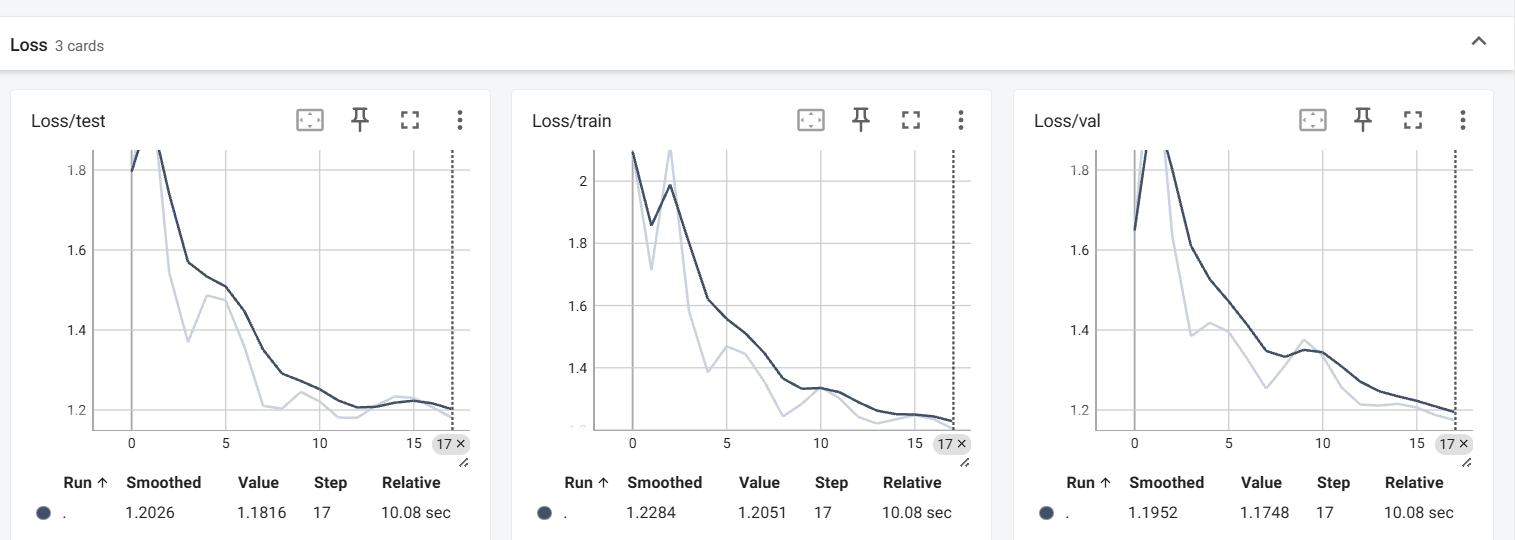

Overall Trend is Similar to the first graph, these lines should ideally show a downward trend, indicating learning and improvement. However Tabular Transformer model seems to have few spikes and uneaven trendline indicating that further impovement is needed in the model ether in terms of hyperparameters or data outliers.

<p style="background-color:#D8BFD8; color: #333333; font-size: 200%; text-align: left; padding-left: 20px;"> Conclusions and Future Work:</p>



---

### Summary

The experiment aimed to classify the mental health status of immigrants using various machine learning and deep learning models. Four algorithms were evaluated:

- **Dummy Classifier**: This baseline model achieved an accuracy of approximately 39.24%, which reflects the performance if we simply predict the majority class.
  
- **Logistic Regression**: With an accuracy of around 40.15%, logistic regression provided a slight improvement over the dummy classifier, indicating some predictive capability based on the dataset's features.

- **Enhanced Perceptron**: Introducing a deep learning approach, the enhanced perceptron achieved an accuracy of 47.82%. This model utilized a multi-layer perceptron architecture with batch normalization and dropout, showing promise in capturing complex relationships within the data.

- **Transformer Model**: Using a transformer-based architecture specifically designed for tabular data, the model achieved an accuracy of 42.46%. While not outperforming the enhanced perceptron in this case, transformers demonstrated their adaptability for sequence-based data processing tasks.

### Recommend a Course of Action Based on the Results

Based on the experiment's findings, the organization should consider the following course of action:

- **Deploy the Enhanced Perceptron Model**: Given its superior performance among the evaluated models, the enhanced perceptron should be deployed for further real-world testing and integration into decision support systems for mental health assessment among immigrant populations.

- **Further Refinement with Transformer Models**: Although the transformer model did not outperform the enhanced perceptron in this study, ongoing research and development should explore further optimizations and adaptations of transformer architectures for similar tasks, potentially leveraging larger datasets or additional features. For now the existing survey is not large enough for such complex approaches, hence in the future the further results with the current one might generate better results.


### Reflect on Limitations and Possible Pitfalls

- **Dataset Representation**: The experiment relied on a dataset primarily focused on Asian American experiences, which may not fully capture the diversity and nuances of mental health challenges among immigrants in other regions, such as Germany.

- **Model Complexity and Interpretability**: Deep learning models like the enhanced perceptron and transformers, while effective, can be challenging to interpret compared to simpler models like logistic regression. This trade-off between performance and interpretability should be carefully considered in practical applications.

### Critically Discuss the Employed Methodology

- **Model Selection and Training**: The choice of models, including logistic regression, perceptron, and transformer, provided a comprehensive exploration of different algorithmic approaches suitable for classification tasks with varying degrees of complexity.

- **Preprocessing and Feature Engineering**: Standardization and one-hot encoding were appropriately applied to preprocess the dataset, ensuring compatibility with the chosen models. However, further feature engineering techniques specific to mental health indicators could potentially enhance model performance.

- **Training and Evaluation**: The methodology employed rigorous training-validation-test splits with early stopping mechanisms, ensuring robust evaluation and mitigation against overfitting.

### Propose Ideas for Future Work

Incorporating additional data that can be generated based on different country statistics or if possible conduct one. Validating models across diverse cultural contexts beyond Asian American communities to generalize findings and adapt interventions for different immigrant groups effectively. 
**More data = more insights.**

---
Overall, the experiment successfully explored various machine learning and deep learning models for classifying the mental health status of immigrants based on the dataset. While achieving moderate accuracy rates ranging from approximately 39% to 48%, the results indicate promising potential, particularly with the enhanced perceptron model. However, the study also identified limitations related to dataset representation and model interpretability. While the experiment provided valuable insights and demonstrated effective model training and evaluation techniques, further refinement and exploration are warranted to enhance predictive accuracy and generalizability across diverse immigrant populations.

---
